<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Code_challenge.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

### Unsupervised Learning Project: 2401FTDS Team JB1
© ExploreAI Academy

## 1. Project Overview
<a class="anchor" id="1-project-overview"></a>

This project involves building both collaborative and content-based recommender systems for a collection of anime titles. The goal is to predict how a user will rate an anime title they have not yet viewed, based on their historical preferences.

### Key Objectives:
- **Collaborative Filtering**: Develop a model that recommends anime based on user similarities and historical ratings.
- **Content-Based Filtering**: Create a model that recommends anime based on the content features of anime titles and user preferences.

### Workflow:
1. **Data Loading**: Import and clean the anime dataset.
2. **Preprocessing**: Handle missing values, encode categorical features, and normalize data.
3. **Model Training**: Train collaborative filtering and content-based models.
4. **Evaluation**: Assess model performance using metric RMSE.
5. **Deployment**: Deploy the final recommender system to provide personalized anime recommendations.

This end-to-end project covers all stages from initial data preparation to the deployment of the recommender system, ensuring a comprehensive approach to building effective and accurate recommendations.

ccurate recommendations.</p>

</body>
</html>


## 2. Importing Packages
<a class = "anchor" id="2-importing-packages"></a>

In [1]:
# Data Processing Libraries
import numpy as np
import pandas as pd
import re
from scipy import stats
import unicodedata
from collections import Counter

# Scikit-learn Libraries for Preprocessing and Model Building
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster import hierarchy
from collections import defaultdict
from wordcloud import WordCloud

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Displays output inline for Jupyter Notebooks
%matplotlib inline

# Libraries for Handling Warnings
import warnings
warnings.filterwarnings('ignore')


---
## 3. Loading Data
The data used for this project was located in the anime.csv, test.csv, and train.csv file. To better manipulate and analyse the anime.csv file, it was loaded into a Pandas Data Frame using the Pandas function, .read_csv() and referred to as titles_import. For demonstrating the column index in the dataframe , index_col=False was implemented.

In [2]:
# Load the datasets
train_df = pd.read_csv('train.csv', index_col=False)
test_df = pd.read_csv('test.csv', index_col=False)
anime_df = pd.read_csv('anime.csv', index_col=False)

# Display the first few rows of the training dataset
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


<div class="alert alert-block alert-danger">
<b>To prevent any major unnecessary changes occurring to the original data</b> , a copy of the dataframe was made using the anime_df.copy() method and referred to as `anime_df_copy`.
</div>

In [3]:
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()
anime_df_copy = anime_df.copy()

#### Inspect the Dataset

Examine the structure of the dataset to understand the types of data and identify any potential issues.

In [4]:
# Check the data types and missing values
print(train_df_copy.info())
print(test_df_copy.info())
print(anime_df_copy.info())

# Get a summary of the dataset
print(train_df_copy.describe(include='all'))
print(test_df_copy.describe(include='all'))
print(anime_df_copy.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703554 entries, 0 to 5703553
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 130.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633686 entries, 0 to 633685
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   633686 non-null  int64
 1   anime_id  633686 non-null  int64
dtypes: int64(2)
memory usage: 9.7 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members 

## Data Overview

### 1. Training Data (`train_df_copy`)
- **Entries**: 5,703,554
- **Columns**: 3
  - `user_id`: int64
  - `anime_id`: int64
  - `rating`: int64
- **Memory Usage**: 130.5 MB
- **Summary Statistics**:
  - **User ID**: Ranges from 1 to 73,516
  - **Anime ID**: Ranges from 1 to 34,475
  - **Rating**: Ranges from 1 to 10, with a mean rating of 7.81

### 2. Testing Data (`test_df_copy`)
- **Entries**: 633,686
- **Columns**: 2
  - `user_id`: int64
  - `anime_id`: int64
- **Memory Usage**: 9.7 MB
- **Summary Statistics**:
  - **User ID**: Ranges from 1 to 73,516
  - **Anime ID**: Ranges from 1 to 34,367

### 3. Anime Data (`anime_df_copy`)
- **Entries**: 12,294
- **Columns**: 7
  - `anime_id`: int64
  - `name`: object
  - `genre`: object
  - `type`: object
  - `episodes`: object
  - `rating`: float64
  - `members`: int64
- **Memory Usage**: 672.5 KB
- **Summary Statistics**:
  - **Genre**: Most frequent genre is 'Hentai'
  - **Type**: Most common type is 'TV'
  - **Episodes**: Ranges from 1 to 1,818
  - **Rating**: Ranges from 1.67 to 10, with a mean rating of 6.47
  - **Members**: Ranges from 5 to 1,013,917

### Key Insights:
- The training data is significantly larger than the testing data, indicating a rich dataset for training.
- The anime dataset shows diverse genres and types with varying numbers of episodes and membership counts.
- The mean rating across anime titles is relatively moderate, suggesting room for fine-tuning recommendation models.


In [5]:
anime_df_copy.shape

(12294, 7)

Results : The dataset consists of 12294 rows (observations) and 7 columns (features).

A look at the summary information of the dataframe by using `.info` and `.shape`.

In [6]:
anime_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


## Anime Dataset Overview

### Data Summary
- **Total Entries**: 12,294
- **Columns**: 7

### Column Details
1. **`anime_id`**:
   - **Non-Null Count**: 12,294
   - **Data Type**: int64

2. **`name`**:
   - **Non-Null Count**: 12,294
   - **Data Type**: object

3. **`genre`**:
   - **Non-Null Count**: 12,232
   - **Data Type**: object
   - **Missing Values**: 62

4. **`type`**:
   - **Non-Null Count**: 12,269
   - **Data Type**: object
   - **Missing Values**: 25

5. **`episodes`**:
   - **Non-Null Count**: 12,294
   - **Data Type**: object

6. **`rating`**:
   - **Non-Null Count**: 12,064
   - **Data Type**: float64
   - **Missing Values**: 230

7. **`members`**:
   - **Non-Null Count**: 12,294
   - **Data Type**: int64

### Memory Usage
- **Total**: 672.5+ KB

### Key Points:
- The dataset is mostly complete, with a few missing values in `genre`, `type`, and `rating`.
- `episodes` is stored as an object type, which may require conversion for numerical operations.
- The `rating` column has some missing values that should be addressed.

This summary provides a clear understanding of the dataset’s structure, completeness, and potential issues that need addressing before analysis.


In [7]:
anime_df.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,12294.0,14058.221653,11455.294701,1.00,3484.25,10260.50,24794.50,34527.0
rating,12064.0,6.473902,1.026746,1.67,5.88,6.57,7.18,10.0
members,12294.0,18071.338864,54820.676925,5.00,225.00,1550.00,9437.00,1013917.0


## Descriptive Statistics of Anime Dataset
### Key Insights:
- **`anime_id`**: The IDs range widely, with a mean ID of 14,058 and a maximum of 34,527.
- **`rating`**: Ratings range from 1.67 to 10, with a mean rating of 6.47 and a standard deviation of 1.03, indicating variability in anime ratings.
- **`members`**: The number of members ranges from 5 to 1,013,917, with a mean of 18,071.34 and a high variability, reflected in the large standard deviation.

This summary provides a comprehensive overview of the statistical properties of the `anime_id`, `rating`, and `members` columns, highlighting their central tendencies, dispersion, and range.

---
# 4. Data Cleaning

<div class="alert alert-block alert-info">
We cleaned the data through text preprocessing and handling missing values and checked for and found one duplicate row. Finally, we validated and saved the data to avoid re-cleaning, ensuring it is reliable and trustworthy.
</div>


In [8]:
def check_and_clean_data(anime_df_copy):
    """
    Check and clean the dataset by:
    1. Printing the count of null values for each column.
    2. Printing the missing values.
    3. Filling or dropping null values.
    4. Dropping duplicate rows.
    5. Performing basic preprocessing such as stripping whitespace and converting text to lowercase.

    Parameters:
    anime_df_copy (pandas.DataFrame): The DataFrame to check and clean.

    Returns:
    pandas.DataFrame: The cleaned DataFrame.
    """
    # Check for null values
    null_counts = anime_df_copy.isnull().sum()
    if null_counts.sum() > 0:
        print("Columns with missing values:")
        print(null_counts[null_counts > 0])
        print("\n")
        
        for column in anime_df_copy.columns:
            missing_rows = anime_df_copy[column].isnull()
            if missing_rows.any():
                print(f"Missing values in '{column}':")
                print(anime_df_copy[missing_rows][[column]])
                print("\n")
            
            # Fill or drop null values as needed
            if anime_df_copy[column].dtype == 'object':
                anime_df_copy[column] = anime_df_copy[column].fillna('unknown')  # Filling null object columns with 'unknown'
            else:
                anime_df_copy[column] = anime_df_copy[column].fillna(anime_df_copy[column].median())  # Filling null numeric columns with median

    # Count and drop duplicate rows
    duplicate_count = anime_df_copy.duplicated().sum()
    print(f'The dataset has {duplicate_count} duplicate rows.')
    anime_df_copy = anime_df_copy.drop_duplicates()

    # Basic preprocessing: strip whitespace and convert to lowercase
    for column in anime_df_copy.select_dtypes(include='object').columns:
        anime_df_copy[column] = anime_df_copy[column].str.strip().str.lower()

    return anime_df_copy

In [9]:
cleaned_anime_df = check_and_clean_data(anime_df_copy)

Columns with missing values:
genre      62
type       25
rating    230
dtype: int64


Missing values in 'genre':
      genre
2844    NaN
3541    NaN
6040    NaN
6646    NaN
7018    NaN
...     ...
11070   NaN
11086   NaN
11097   NaN
11112   NaN
11113   NaN

[62 rows x 1 columns]


Missing values in 'type':
      type
10898  NaN
10900  NaN
10906  NaN
10907  NaN
10918  NaN
10949  NaN
10963  NaN
10983  NaN
10988  NaN
10990  NaN
10991  NaN
10994  NaN
10995  NaN
10998  NaN
11010  NaN
11013  NaN
11041  NaN
11053  NaN
11055  NaN
11058  NaN
11062  NaN
11070  NaN
11101  NaN
12252  NaN
12259  NaN


Missing values in 'rating':
       rating
8968      NaN
9657      NaN
10896     NaN
10897     NaN
10898     NaN
...       ...
12274     NaN
12279     NaN
12280     NaN
12282     NaN
12285     NaN

[230 rows x 1 columns]


The dataset has 0 duplicate rows.


In [34]:
cleaned_anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,kimi no na wa,"drama, romance, school, supernatural",movie,1.0,9.37,200630
1,5114,fullmetal alchemist brotherhood,"action, adventure, drama, fantasy, magic, mili...",tv,64.0,9.26,793665
2,28977,gintama,"action, comedy, historical, parody, samurai, s...",tv,51.0,9.25,114262
3,9253,steinsgate,"sci-fi, thriller",tv,24.0,9.17,673572
4,9969,gintama039,"action, comedy, historical, parody, samurai, s...",tv,51.0,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,toushindai my lover minami tai mechaminami,hentai,ova,1.0,4.15,211
12290,5543,under world,hentai,ova,1.0,4.28,183
12291,5621,violence gekiga david no hoshi,hentai,ova,4.0,4.88,219
12292,6133,violence gekiga shin david no hoshi inma densetsu,hentai,ova,1.0,4.98,175


## Overview of Cleaned Anime Dataset
### Key Observations

- **Data Structure**: The dataset includes 12,294 entries and 7 columns.
- **Column Details**:
  - **`anime_id`**: Unique identifier for each anime.
  - **`name`**: Contains anime titles which need further cleaning to address special characters and formatting issues.
  - **`genre`**: Lists the genres associated with each anime.
  - **`type`**: Indicates the type of the anime (e.g., movie, TV series, OVA).
  - **`episodes`**: Number of episodes, though this may need conversion to a numeric format if stored as an object.
  - **`rating`**: Rating of the anime, which appears to be clean.
  - **`members`**: Number of members who have rated the anime.

### Data Cleaning Note

The `name` column contains special characters and formatting issues that need to be addressed for accurate analysis and processing. Further cleaning of this column is necessary to ensure consistency and reliability in the dataset.

This overview provides a snapshot of the dataset's structure and highlights areas that require additional cleaning before proceeding with analysis or modeling.


In [11]:
def clean_anime_names(df):
    """
    Clean the anime names in the dataframe to handle special characters and formatting issues.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the anime data with a 'name' column.
    
    Returns:
    pd.DataFrame: The dataframe with cleaned anime names.
    """
    def normalize_text(text):
        # Normalize unicode characters
        text = unicodedata.normalize('NFKC', text)
        # Remove special characters and unwanted formatting
        text = re.sub(r'[^\w\s]', '', text)
        # Remove extra whitespace
        text = text.strip()
        return text
    
    # Apply the cleaning function to the 'name' column
    df['name'] = df['name'].apply(normalize_text)
    
    return df


In [12]:
cleaned_anime_df = clean_anime_names(cleaned_anime_df)

In [13]:
print(cleaned_anime_df)

       anime_id                                               name  \
0         32281                                      kimi no na wa   
1          5114                    fullmetal alchemist brotherhood   
2         28977                                            gintama   
3          9253                                         steinsgate   
4          9969                                         gintama039   
...         ...                                                ...   
12289      9316         toushindai my lover minami tai mechaminami   
12290      5543                                        under world   
12291      5621                     violence gekiga david no hoshi   
12292      6133  violence gekiga shin david no hoshi inma densetsu   
12293     26081                      yasuji no pornorama yacchimae   

                                                   genre   type episodes  \
0                   drama, romance, school, supernatural  movie        1   
1      

## Cleaned Anime Names

### Summary

The `name` column in the dataset has been cleaned to address special characters and formatting issues. The updated `name` column now contains:

- **Standardized Titles**: Titles are free from special characters and formatting inconsistencies.

### Insight

The cleaning process ensures that anime titles are consistently formatted, which enhances the accuracy of data processing, matching, and analysis. This is essential for reliable recommendations and effective data exploration.


In [14]:
cleaned_anime_df['name'].value_counts()

name
shinryaku ika musume                                3
yuru yuri nachuyachumi                              2
saru kani gassen                                    2
gochuumon wa usagi desu ka                          2
kimi to boku                                        2
                                                   ..
mahou no princess minky momo yume wo dakishimete    1
makenki ova                                         1
mazebakunetsu jikuu tv                              1
meiken jolie                                        1
yasuji no pornorama yacchimae                       1
Name: count, Length: 12262, dtype: int64

In [15]:
#Find entries of anime names with duplicates
cleaned_anime_df[cleaned_anime_df['name'].isin(['shinryaku ika musume', 'moritasan wa mukuchi', 'nisekoi', 'kon uraon', 'gintama'])]

,anime_id,name,genre,type,episodes,rating,members
2,28977,gintama,"action, comedy, historical, parody, samurai, s...",tv,51,9.25,114262
12,918,gintama,"action, comedy, historical, parody, samurai, s...",tv,201,9.04,336376
665,18897,nisekoi,"comedy, harem, romance, school, shounen",tv,20,7.91,347599
1239,10378,shinryaku ika musume,"comedy, shounen, slice of life",tv,12,7.62,45613
1297,8557,shinryaku ika musume,"comedy, shounen, slice of life",tv,12,7.60,95242
1431,13267,shinryaku ika musume,"comedy, shounen, slice of life",ova,3,7.55,13456
1574,27787,nisekoi,"comedy, harem, romance, school, shounen",tv,12,7.50,180686
4565,9774,moritasan wa mukuchi,"comedy, school, slice of life",ova,1,6.69,6636
4809,10671,moritasan wa mukuchi,"comedy, school, slice of life",tv,13,6.63,15046
4839,9203,kon uraon,comedy,special,9,6.62,23216


Given that the duplicate names correspond to different entries (with varying anime_id, type, episodes, rating, and members), it seems these duplicates are valid and represent different seasons, versions, or formats of the same anime. Therefore, removing these entries outright might lead to loss of important information.

In [16]:
# Check for entries with 'Unknown' episode count
unknown_episodes = cleaned_anime_df[cleaned_anime_df['episodes'] == 'Unknown']['name'][:5]
print("Anime with 'Unknown' episode count:")
print(unknown_episodes)

Anime with 'Unknown' episode count:
Series([], Name: name, dtype: object)


## Checking for 'Unknown' Episode Counts

### Summary

The code snippet checks for entries in the `cleaned_anime_df` dataset where the `episodes` column contains the value `'Unknown'`. It prints the names of the first five anime titles with unknown episode counts.

### Insight

Identifying and handling entries with unknown episode counts is crucial for data quality. These entries can potentially impact the analysis and recommendations if not addressed. This step ensures that we are aware of missing data and can make informed decisions on how to handle such cases in the recommender system.


# 5. Exploratory Data Analysis (EDA) of Anime Dataset

This notebook provides a detailed exploratory data analysis (EDA) of the anime dataset. We will explore the structure of the dataset, visualize the distributions of key features, and identify interesting patterns or correlations.


In [17]:
# Load the data
anime_df = cleaned_anime_df.copy()

# Preview the first few rows of the dataset
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,kimi no na wa,"drama, romance, school, supernatural",movie,1,9.37,200630
1,5114,fullmetal alchemist brotherhood,"action, adventure, drama, fantasy, magic, mili...",tv,64,9.26,793665
2,28977,gintama,"action, comedy, historical, parody, samurai, s...",tv,51,9.25,114262
3,9253,steinsgate,"sci-fi, thriller",tv,24,9.17,673572
4,9969,gintama039,"action, comedy, historical, parody, samurai, s...",tv,51,9.16,151266


The `anime_df` dataset contains information about various anime. The columns include:
- `anime_id`: Unique identifier for each anime
- `name`: Name of the anime
- `type`: Type of anime (e.g., TV, Movie, OVA)
- `episodes`: Number of episodes
- `rating`: Average rating
- `members`: Number of members who have rated the anime
- Various genre columns (e.g., `Adventure`, `Comedy`, `Drama`, etc.), each indicating the presence (1) or absence (0) of the genre in the anime


In [18]:
anime_df.describe

<bound method NDFrame.describe of        anime_id                                               name  \
0         32281                                      kimi no na wa   
1          5114                    fullmetal alchemist brotherhood   
2         28977                                            gintama   
3          9253                                         steinsgate   
4          9969                                         gintama039   
...         ...                                                ...   
12289      9316         toushindai my lover minami tai mechaminami   
12290      5543                                        under world   
12291      5621                     violence gekiga david no hoshi   
12292      6133  violence gekiga shin david no hoshi inma densetsu   
12293     26081                      yasuji no pornorama yacchimae   

                                                   genre   type episodes  \
0                   drama, romance, school, super

The dataset contains 12294 entries and 7 columns, including `anime_id`, `name`, `genre`, `type`, `episodes`, `rating`, and `members` being key features.


## Generating and Visualizing Genre Frequencies

### Summary

This code snippet processes the `genre` column from the `cleaned_anime_df` dataset to generate a frequency distribution of genres. It uses the `WordCloud` library to create a visual representation of the genre frequencies, which helps in understanding the most prevalent genres in the dataset.

### Insight

Visualizing genre frequencies using a word cloud allows us to quickly identify the most common genres among anime titles. This insight is useful for understanding genre distribution and trends in the dataset, which can inform the development and evaluation of recommendation systems. 


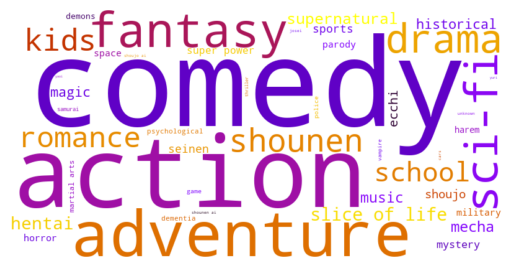

In [19]:
# Generate genre frequencies
all_genres = defaultdict(int)

for genres in cleaned_anime_df['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1

# Create and display the word cloud
genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)

plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The word cloud visualizes the distribution of anime genres in the dataset. From the visualization, we observe that **Action**, **Comedy**, and **Adventure** are the most frequently occurring genres. These genres are prominently displayed, indicating their high prevalence across the anime titles. This insight can help in understanding genre popularity and guiding recommendations based on common genre interests.


## Rating Distribution Analysis

The plot generated by the `plot_rating_distribution` function provides insights into the distribution of anime ratings. Key observations include:

- **Frequency Distribution**: The histogram illustrates how often each rating value occurs in the dataset.
- **Rating Trends**: The Kernel Density Estimate (KDE) line reveals the overall trends and patterns in the rating data.

### Implications for the Project

Understanding the distribution of ratings is essential for several reasons:

- **User Preferences**: Identifying prevalent rating values can guide the customization of recommendations to align with common user preferences.
- **Modeling**: Insight into rating distribution helps in designing predictive models that accurately reflect the range and frequency of ratings.
- **Data Quality**: Assessing the spread of ratings aids in evaluating the balance of the dataset and identifying potential biases.

Analyzing the rating distribution allows us to fine-tune the recommender system, enhancing its ability to meet user expectations and improving recommendation accuracy.


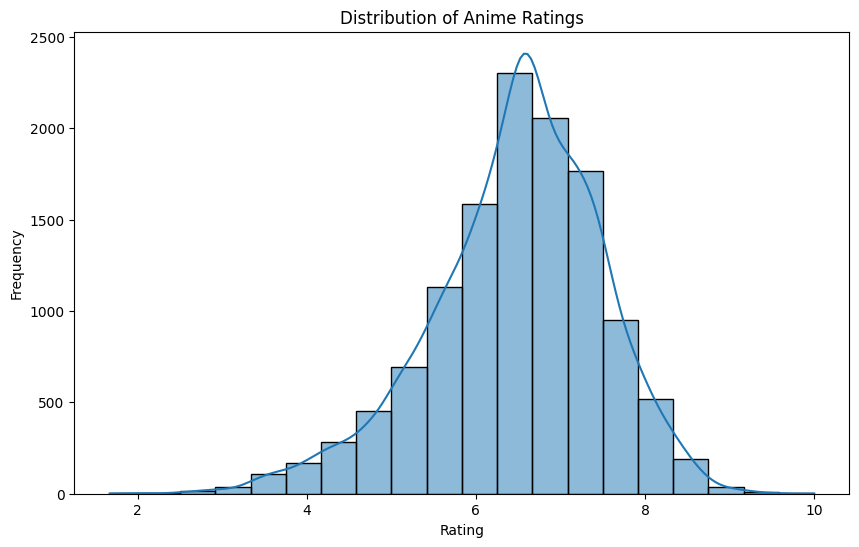

In [20]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a histogram plot with a kernel density estimate
sns.histplot(cleaned_anime_df['rating'], bins=20, kde=True)

# Set the title of the plot
plt.title('Distribution of Anime Ratings')

# Label the x-axis
plt.xlabel('Rating')

# Label the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()

Distribution of Anime Ratings

The distribution of anime ratings shows a near-normal distribution with a peak around a rating of 0.6. This suggests that most anime tend to have average ratings, with fewer anime receiving very low or very high ratings. The density plot (kde) overlay indicates a smooth distribution, emphasizing the central tendency and variability of the ratings.



### Episode Distribution Analysis

The `plot_episodes_distribution` function performs the following tasks:

- **Conversion to Numeric**: Converts episode counts to numeric values, setting non-numeric values to NaN.
- **Data Cleaning**: Removes rows with NaN values to ensure valid data for analysis.
- **Visualization**: Plots a histogram with a Kernel Density Estimate (KDE) line to visualize the distribution of episode counts.

### Implications for the Project

- **Data Quality**: Ensures the dataset is clean by handling non-numeric and missing values, improving data reliability.
- **Content Analysis**: Provides insights into episode count trends, aiding in understanding content length preferences.
- **Recommendation System**: Enhances recommendation accuracy by considering episode count distribution for better filtering and feature creation.

This function helps in understanding dataset characteristics and refining the recommendation system.


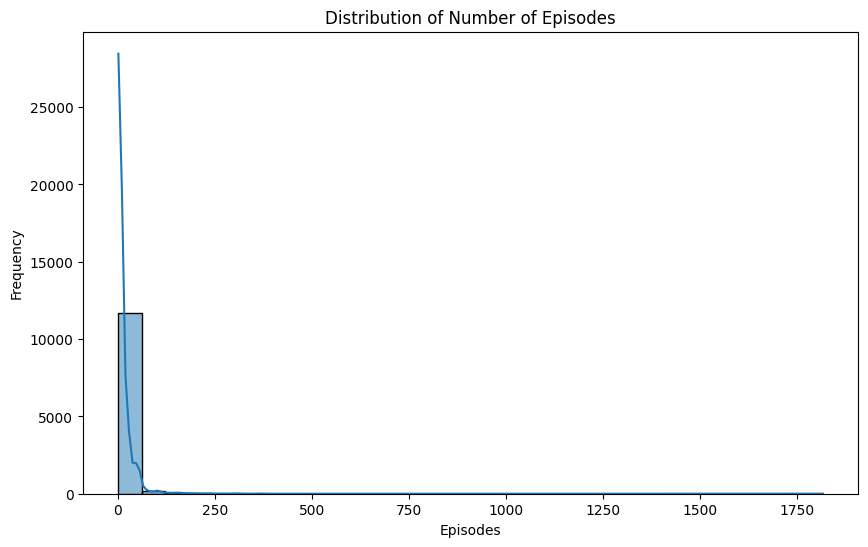

In [21]:
# Convert 'episodes' column to numeric, setting errors='coerce' to handle non-numeric values
cleaned_anime_df['episodes'] = pd.to_numeric(cleaned_anime_df['episodes'], errors='coerce')

# Drop rows with NaN values in the 'episodes' column
cleaned_dataframe = cleaned_anime_df.dropna(subset=['episodes'])

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a histogram plot with a kernel density estimate
sns.histplot(cleaned_dataframe['episodes'], bins=30, kde=True)

# Set the title of the plot
plt.title('Distribution of Number of Episodes')

# Label the x-axis
plt.xlabel('Episodes')

# Label the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()

Distribution of Number of Episodes

The distribution of the number of episodes is highly skewed to the right, indicating that the majority of anime have a relatively low number of episodes. The plot shows a sharp decline after the initial few bins, with a long tail extending to the right. This suggests that while most anime series are short, there are a few long-running series with a significantly higher number of episodes.



In [22]:
# Split the genre strings and count each genre
def count_genres(df):
    """
    Count the frequency of each genre from the 'genre' column in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the 'genre' column.
    
    Returns:
    pd.Series: A Series with genre counts, sorted in descending order.
    """
    genre_list = df['genre'].str.split(', ', expand=True).stack()
    genre_counts = genre_list.value_counts()
    return genre_counts

# Calculate genre counts
genre_counts = count_genres(cleaned_anime_df)

### Genre Frequency Analysis

The `plot_top_genres` function performs the following tasks:

- **Top N Selection**: Identifies and visualizes the top N genres based on their frequency.
- **Visualization**: Generates a bar plot to display the most common genres and their corresponding frequencies.

### Implications for the Project

Analyzing genre distribution is valuable for the following reasons:

- **Content Insight**: Helps pinpoint the most common genres in the dataset, which can guide content recommendations and spotlight popular genres.
- **Recommendation System**: Assists in refining the recommender system by emphasizing frequently occurring genres, thereby improving recommendation relevance.
- **Data Exploration**: Provides a visual overview of genre distribution, facilitating initial data exploration and feature engineering.

By examining and visualizing the top genres, we can better understand genre trends and preferences, which is essential for creating an effective recommendation system.


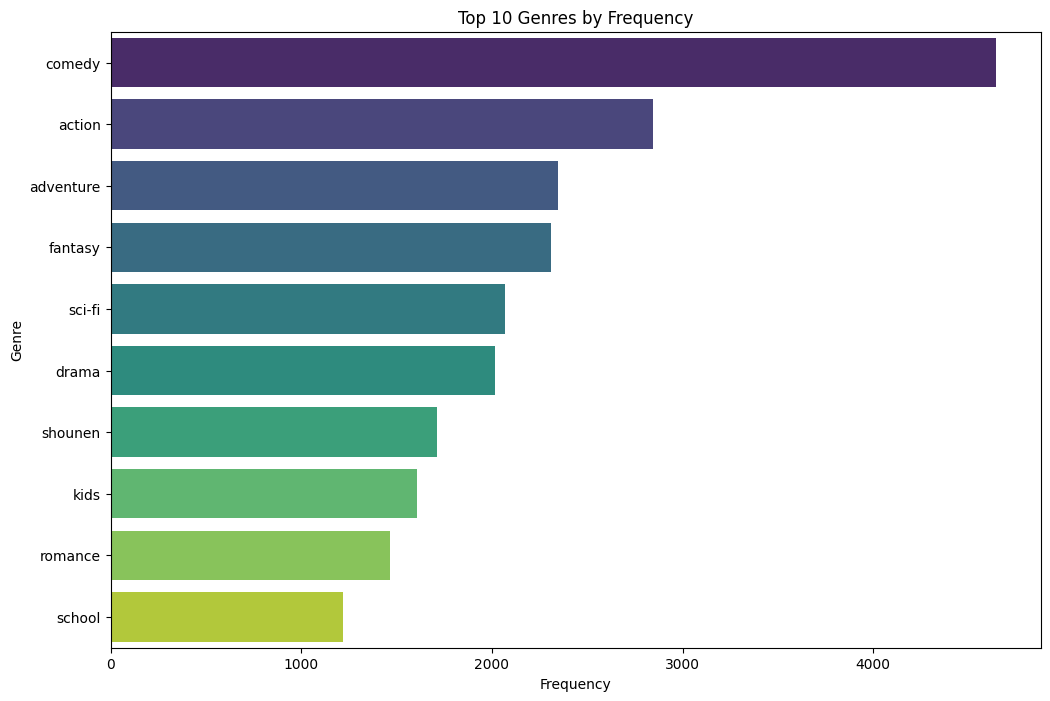

In [23]:
# Set up the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot of the top 10 genres
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='viridis')

# Set the title of the plot
plt.title('Top 10 Genres by Frequency')

# Label the x-axis
plt.xlabel('Frequency')

# Label the y-axis
plt.ylabel('Genre')

# Display the plot
plt.show()

Top 10 Genres by Frequency

The bar plot of the top 10 genres by frequency reveals that 'Comedy' is the most common genre, followed by 'Action', 'Sci-Fi', and 'Fantasy'. This indicates a preference or trend towards lighter, more entertaining content as well as action-packed and science fiction themes. The presence of genres like 'Romance', 'Kids', and 'School' suggests a diverse range of interests among the anime audience.



In [24]:
def encode_genres(df):
    """
    Encode genres into binary columns for each unique genre.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the 'genre' column.
    
    Returns:
    pd.DataFrame: DataFrame with binary columns for each genre.
    """
    # Split genres and create binary columns for each genre
    genres = df['genre'].str.get_dummies(sep=', ')
    return genres

encoded_genres_df = encode_genres(cleaned_anime_df)

# Calculate the correlation matrix
correlation_matrix = encoded_genres_df.corr()


## Correlation Matrix Analysis

The `plot_correlation_matrix` function performs the following tasks:

- **Correlation Matrix Plotting**: Visualizes the correlation matrix using a heatmap. This provides a comprehensive view of how different genres correlate with each other.
- **Color Mapping**: Utilizes a color map (`coolwarm`) to highlight positive and negative correlations, with `vmin` and `vmax` set to -1 and 1 for a standardized color range.

### Implications for the Project

Understanding the correlation between genres is beneficial for the following reasons:

- **Content Relationships**: Helps identify how different genres relate to each other, which can provide insights into genre co-occurrence and content similarities.
- **Feature Engineering**: Aids in designing features for the recommendation system based on genre correlations, improving the accuracy of recommendations by capturing genre relationships.
- **Data Exploration**: Offers a visual summary of how genres interact, which is valuable for exploratory data analysis and identifying patterns within the dataset.

By analyzing the correlation matrix, you can gain a deeper understanding of genre relationships, which is crucial for enhancing the recommendation system and making more informed decisions for the project.


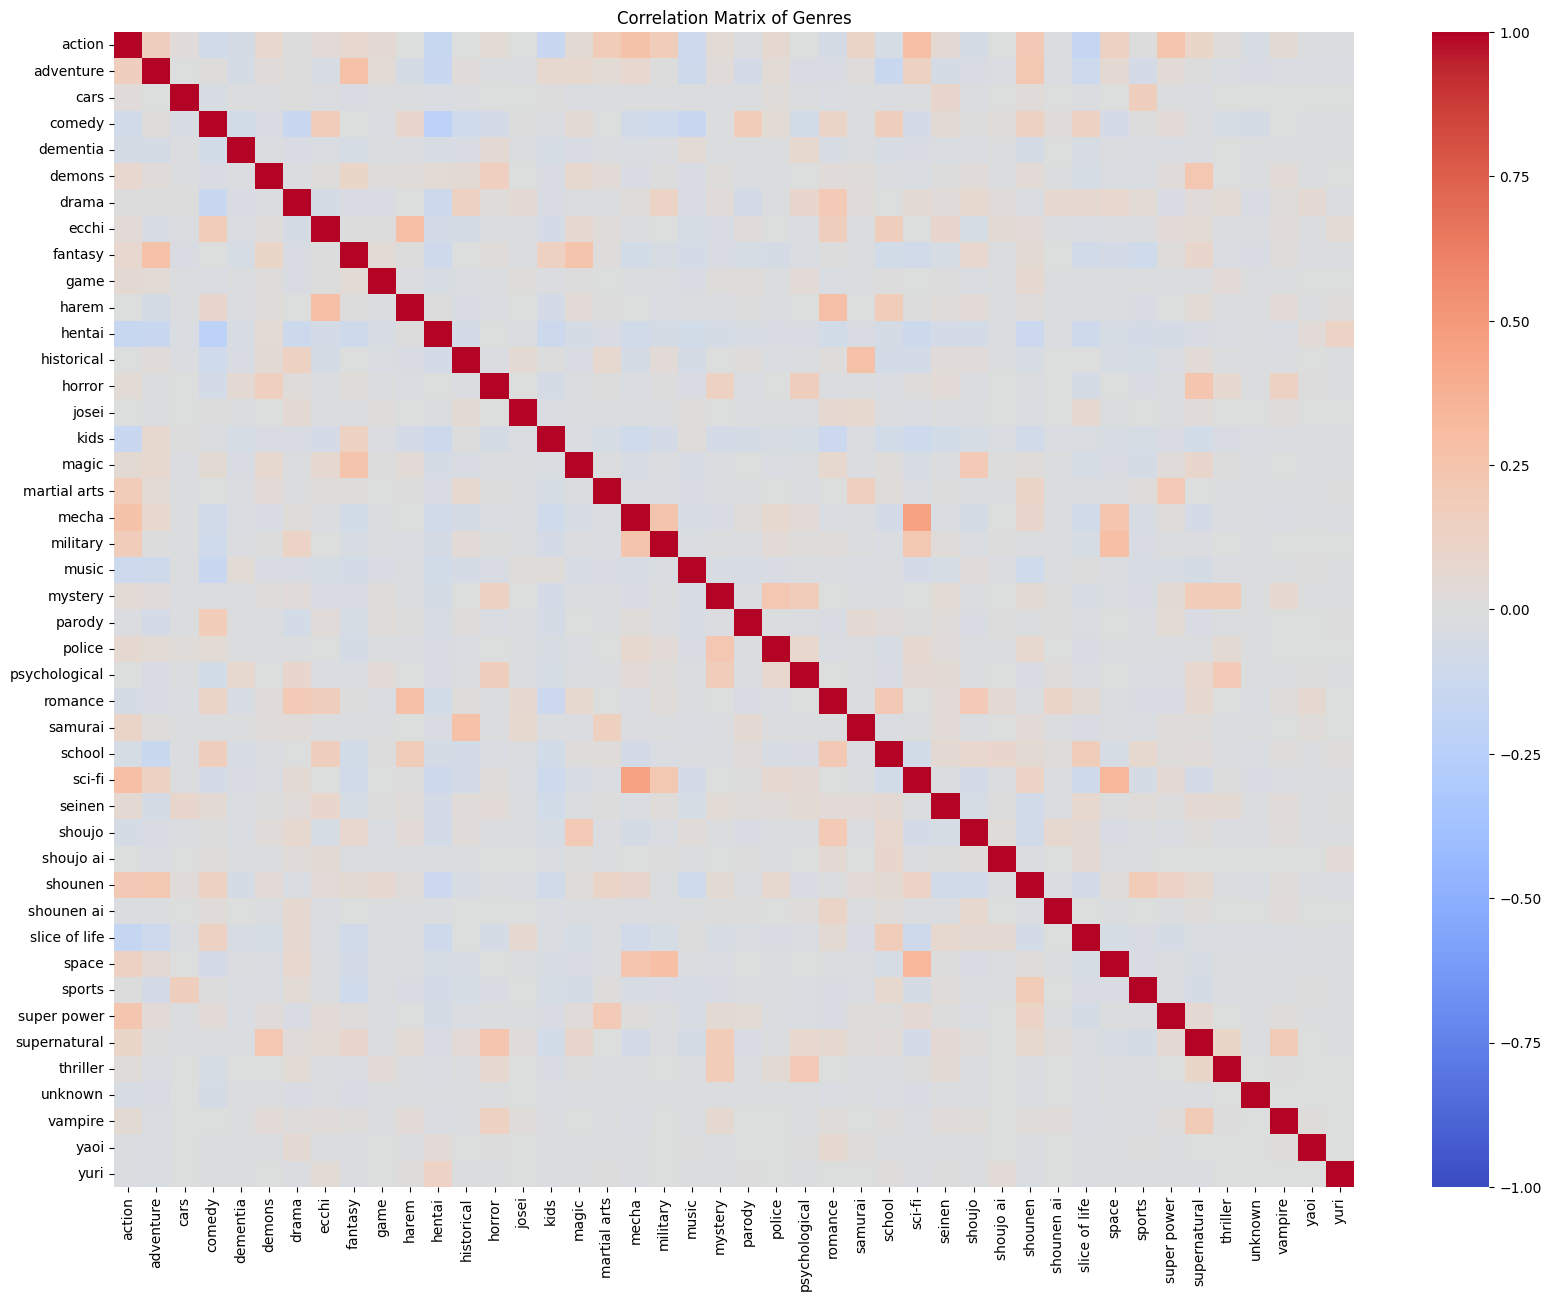

In [25]:
# Set up the figure size
plt.figure(figsize=(20, 15))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

# Set the title of the plot
plt.title('Correlation Matrix of Genres')

# Display the plot
plt.show()

The correlation matrix shows the relationships between different genres. This helps us understand if certain genres tend to co-occur more frequently.


## Top 20 Anime by Number of Members Analysis

The `plot_top_20_anime_by_members` function performs the following tasks:

- **Data Cleaning**: Ensures that the 'members' column is numeric and drops rows with NaN values to maintain data quality.
- **Top N Selection**: Sorts the DataFrame by the number of members and selects the top 20 anime.
- **Visualization**: Creates a horizontal bar plot displaying the top 20 anime based on the number of members.

### Implications for the Project

Understanding the top 20 anime by the number of members provides valuable insights:

- **Popularity Trends**: Identifies the most popular anime based on membership, which can be useful for content recommendations and understanding audience preferences.
- **Recommendation System**: Helps in tailoring recommendations by highlighting highly popular anime, which can be leveraged to enhance the system's accuracy and relevance.
- **Data Exploration**: Offers a clear visual representation of the most widely watched anime, aiding in exploratory data analysis and feature engineering.

By analyzing and visualizing the top 20 anime by number of members, you can gain deeper insights into content popularity, which is crucial for improving the recommendation system and making data-driven decisions for the project.


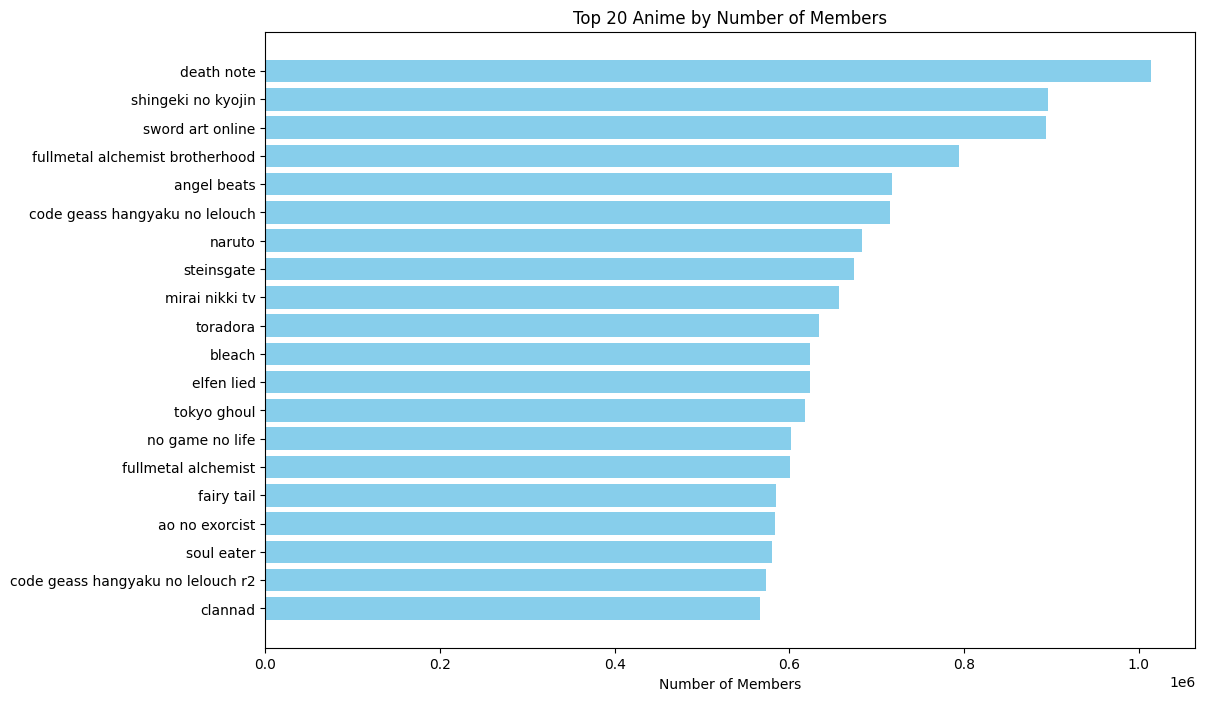

In [26]:
# Ensure 'members' is numeric
cleaned_anime_df['members'] = pd.to_numeric(cleaned_anime_df['members'], errors='coerce')

# Drop rows with NaN values in 'members' column
cleaned_anime_df = cleaned_anime_df.dropna(subset=['members'])

# Sort by number of members and select top 20
top_20_anime = cleaned_anime_df.sort_values(by='members', ascending=False).head(20)

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot
plt.barh(top_20_anime['name'], top_20_anime['members'], color='skyblue')

# Label the x-axis
plt.xlabel('Number of Members')

# Set the title of the plot
plt.title('Top 20 Anime by Number of Members')

# Invert the y-axis so the highest values are on top
plt.gca().invert_yaxis()

# Display the plot
plt.show()

Rating's are a big factor when choosing anime's with low members because the few that watched them are generally people who criticize and judge the show enough to leave a rating.For some specific genres ratings between 6 to 7 are golden for me.Let's see the top ones.

In [36]:
# Filter and sort the DataFrame
top_anime_table = cleaned_anime_df[['name', 'rating', 'members']].sort_values(by='rating', ascending=False).query('members > 250000').head(20)

# Display the table
top_anime_table

,name,rating,members
1,fullmetal alchemist brotherhood,9.26,793665
3,steinsgate,9.17,673572
6,hunter x hunter 2011,9.13,425855
10,clannad after story,9.06,456749
12,gintama,9.04,336376
13,code geass hangyaku no lelouch r2,8.98,572888
15,sen to chihiro no kamikakushi,8.93,466254
16,shigatsu wa kimi no uso,8.92,416397
19,code geass hangyaku no lelouch,8.83,715151
22,cowboy bebop,8.82,486824


## Insights on Top-Rated Anime with High Member Counts

Ratings are a critical factor when choosing anime, especially for shows with lower member counts. This is because those few viewers are often more discerning and critical, leaving detailed ratings that reflect their strong opinions. For some genres, ratings between 6 and 7 are considered ideal.

### Top Anime with High Ratings and Member Counts

The table below shows the top 20 anime based on ratings and having more than 250,000 members.
### Implications for the Project

- **Content Quality**: High ratings and significant member counts indicate that these anime are widely appreciated and well-regarded, making them excellent choices for recommendations.
- **Recommendation System**: Incorporating highly rated anime with large audiences into the recommendation system can enhance its effectiveness by promoting popular and critically acclaimed content.
- **Data-Driven Decisions**: Analyzing these top-rated anime helps in understanding viewer preferences and tailoring recommendations to match popular and highly rated content.

By focusing on anime with high ratings and member counts, we can refine the recommendation system to better align with user preferences and ensure that recommendations are relevant and appealing.


## Top 20 Anime by Ratings

The `plot_top_20_anime_by_ratings` function performs the following tasks:

1. **Rating Validation**: Ensures the 'rating' column contains numeric values, coercing errors.
2. **Data Cleaning**: Removes rows with NaN values in the 'rating' column to maintain data integrity.
3. **Sorting and Selection**: Sorts the DataFrame by ratings in descending order and selects the top 20 anime.
4. **Plotting**: Creates a horizontal bar plot to visualize the top 20 anime based on ratings, with the highest-rated anime at the top.

### Implications for the Project

- **Content Quality Insight**: Visualizing the top-rated anime helps identify high-quality content that is well-received by viewers.
- **Recommendation System Improvement**: High ratings can be a crucial factor in recommending anime, as they reflect viewer satisfaction and engagement.
- **Data Exploration**: This plot provides a quick overview of the best-rated anime, aiding in exploratory data analysis and decision-making.

By analyzing the top 20 anime based on ratings, you can gain valuable insights into the content that resonates most with viewers, enhancing the recommendation system and making more informed decisions for the project.


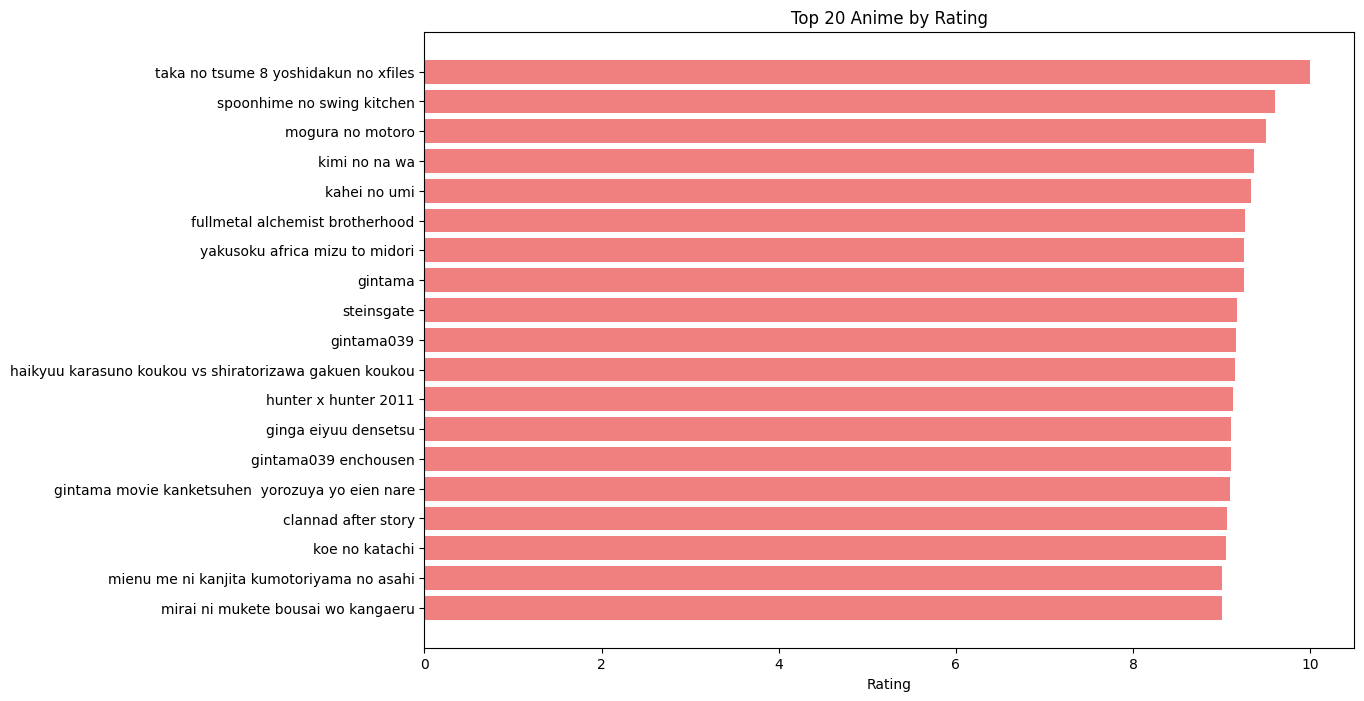

In [37]:
# Ensure 'rating' is numeric
cleaned_anime_df['rating'] = pd.to_numeric(cleaned_anime_df['rating'], errors='coerce')

# Drop rows with NaN values in 'rating' column
cleaned_anime_df = cleaned_anime_df.dropna(subset=['rating'])

# Sort by rating and select top 20
top_20_anime = cleaned_anime_df.sort_values(by='rating', ascending=False).head(20)

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot
plt.barh(top_20_anime['name'], top_20_anime['rating'], color='lightcoral')

# Label the x-axis
plt.xlabel('Rating')

# Set the title of the plot
plt.title('Top 20 Anime by Rating')

# Invert the y-axis so the highest values are on top
plt.gca().invert_yaxis()

# Display the plot
plt.show()

In [29]:
cleaned_anime_df.value_counts("type")

type
tv         3787
ova        3311
movie      2348
special    1676
ona         659
music       488
unknown      25
Name: count, dtype: int64

## Anime Category Distribution

The `plot_anime_category_distribution` function performs the following tasks:

1. **Category Distribution Calculation**: Computes the percentage distribution of anime categories and prints the result.
2. **Data Visualization**: Plots a count plot to visualize the frequency of each anime category, providing a clear overview of the dataset's composition.

By analyzing the anime category distribution, you can gain valuable insights into the composition of your dataset, which is crucial for enhancing the recommendation system and making informed decisions for the project.


Anime Category Distribution
type
tv         30.80
ova        26.93
movie      19.10
special    13.63
ona         5.36
music       3.97
unknown     0.20
Name: proportion, dtype: float64


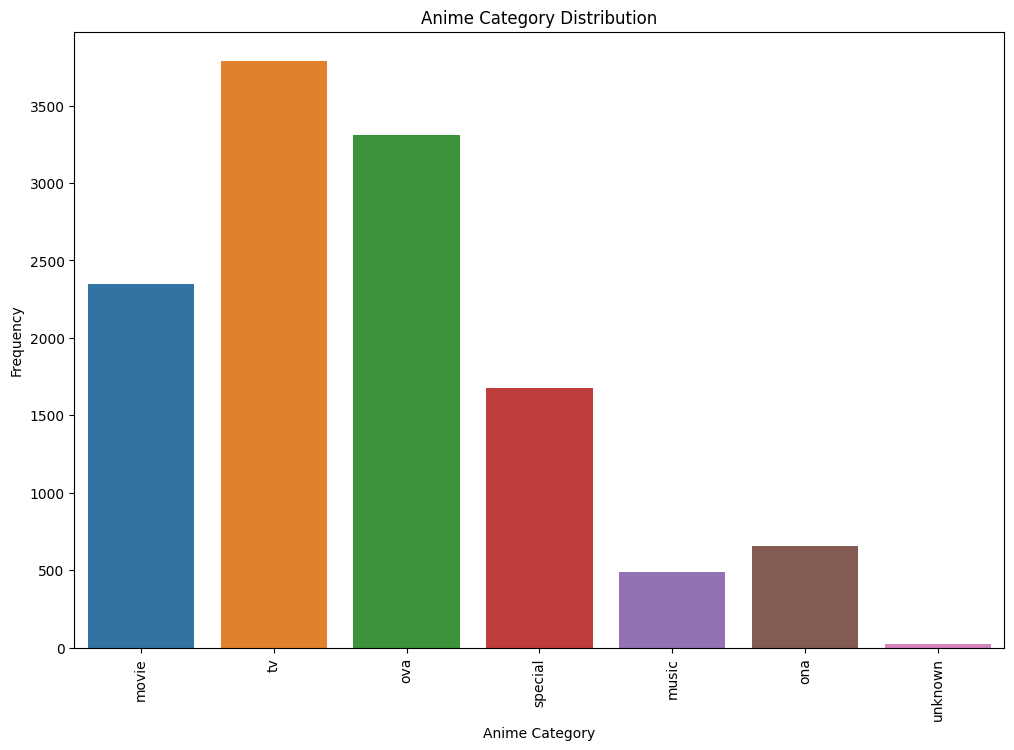

In [30]:
# Calculate the distribution of anime categories
category_distribution = round(cleaned_anime_df['type'].value_counts(normalize=True).mul(100), 2)

# Print the distribution
print("Anime Category Distribution")
print(category_distribution)

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create a count plot of anime categories
sns.countplot(data=cleaned_anime_df, x='type')

# Label the x-axis
plt.xlabel("Anime Category")

# Label the y-axis
plt.ylabel("Frequency")

# Set the title of the plot
plt.title("Anime Category Distribution")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

### Insights

- **TV Format**: The majority of anime entries, 30.80%, are aired on TV. This indicates that TV remains the most popular format for anime distribution.
- **OVA Format**: Original Video Animation (OVA) constitutes 26.93% of the total entries. This format is often used for special releases or additional content not aired on TV.
- **Movie Format**: Streaming as a movie is another popular format, with 19.10% of the total entries falling into this category. This format is typically reserved for high-budget productions or special adaptations.
- **Special Format**: Special episodes or features make up 13.63% of the entries. These are usually additional content related to TV series or movies.
- **ONA Format**: Original Net Animation (ONA) includes 5.36% of the total entries. This format is specifically created for internet streaming platforms.
- **Music Format**: Music-related anime, which includes promotional videos or music-themed episodes, accounts for 3.97% of the total entries.
- **Unknown Format**: A small proportion of entries, 0.20%, fall into the unknown category, indicating entries where the format is not specified.

### Implications for the Project

Understanding the distribution of anime formats helps identify the primary mediums through which anime content is delivered. This can inform the development of recommendation algorithms and content strategies, ensuring a comprehensive approach to catering to different viewer preferences and formats.


# 6. Preprocessing for Model Development

## `preprocess_data(df)`

In this section, we will dive into the data preprocessing task. The `preprocess_data` function is designed to clean and prepare the DataFrame `df` through the following steps:

1. **Handle Missing Values:**
   - Convert the `episodes` column to numeric, handling errors by setting them to `NaN`, and then fill these missing values with the median of the column.
   - Replace missing values in the `rating` column with its median value.

2. **Outlier Detection and Removal:**
   - Detect outliers in the `episodes`, `rating`, and `members` columns using Z-scores.
   - Exclude rows where any Z-score is greater than 3.

3. **Feature Normalization:**
   - Normalize the `episodes`, `rating`, and `members` columns using Min-Max Scaling to ensure all values are within the range [0, 1].
   - Include the encoded genre columns in the normalization process to ensure consistent scaling across all features.

4. **Genre Encoding:**
   - Encode the `genre` column using one-hot encoding, creating binary columns for each genre.
   - Rename the one-hot encoded columns to include the prefix `encoded_genre_` for clarity and consistency.

5. **Return Cleaned Data:**
   - Return the DataFrame after preprocessing, which now includes the normalized encoded genre columns and has the original `genre` column removed.

This function ensures that the data is cleaned, outlier-free, normalized, and properly encoded for further analysis. It prepares the dataset by handling missing values, removing outliers, scaling numerical and genre features, and encoding categorical genre data for effective machine learning modeling.
further analysis.


In [31]:
def preprocess_data(df):
    """
    Preprocesses the anime dataset by handling missing values, outliers, normalizing numerical features, encoding genres,
    and scaling encoded genre features.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing anime data.

    Returns:
    - pd.DataFrame: The preprocessed DataFrame.
    """
    # Check for ratings of -1 and handle them
    if df['rating'].eq(-1).any():
        print("Found ratings of -1. These will be handled.")

    # Drop rows where rating is -1
    df = df[df['rating'] != -1]
    
    # Handle missing values
    df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
    df['episodes'].fillna(df['episodes'].median(), inplace=True)
    df['rating'].fillna(df['rating'].median(), inplace=True)
    
    # List of columns to consider for outlier detection and normalization
    numeric_cols = ['episodes', 'rating', 'members']
    
    # Handle outliers
    z_scores = stats.zscore(df[numeric_cols])
    df = df[(np.abs(z_scores) < 3).all(axis=1)]
    
    # Encode genre column using one-hot encoding
    genre_df = df['genre'].str.get_dummies(sep=', ')
    genre_df.columns = [col for col in genre_df.columns]
    
    # Concatenate the encoded genre columns with the original DataFrame
    df = pd.concat([df.drop('genre', axis=1), genre_df], axis=1)
    
    # Update the list of columns for normalization to include encoded genre features
    all_cols = numeric_cols + list(genre_df.columns)
    
    # Normalize numerical and genre features
    scaler = MinMaxScaler()
    df[all_cols] = scaler.fit_transform(df[all_cols])
    
    return df


In [32]:
# Preprocess data
anime_df_processed = preprocess_data(anime_df)

In [33]:
anime_df_processed.head(3)

,anime_id,name,type,episodes,rating,members,action,adventure,cars,comedy,...,slice of life,space,sports,super power,supernatural,thriller,unknown,vampire,yaoi,yuri
2,28977,gintama,tv,0.335570,0.958814,0.627031,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9969,gintama039,tv,0.335570,0.943987,0.830106,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,32935,haikyuu karasuno koukou vs shiratorizawa gakue...,tv,0.060403,0.942339,0.512274,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Insights

- **Preprocessing Overview**: The `preprocess_data` function has been applied to the `anime_df` DataFrame, resulting in a cleaned and prepared dataset. This preprocessing includes handling missing values, outlier removal, normalization of numerical features, encoding of genre information, and scaling of encoded genre features.

- **Missing Values and Outliers**: The dataset now has missing values in the `episodes` and `rating` columns replaced with their respective medians. Outliers have been removed based on Z-scores, ensuring that extreme values do not skew the analysis.

- **Normalization**: Numerical features such as `episodes`, `rating`, and `members` have been normalized using Min-Max Scaling. Additionally, the one-hot encoded genre features have also been scaled to ensure consistency. This ensures that all features are within the range [0, 1], which is essential for many machine learning algorithms that are sensitive to the scale of input features.

- **Genre Encoding and Scaling**: The `genre` column has been transformed into multiple binary columns using one-hot encoding. Each genre now has its own column with a binary indicator, and these genre columns have been scaled alongside the numerical features. This makes it easier for models to interpret and utilize genre information effectively.

## Implications for the Project

- **Improved Data Quality**: By handling missing values and outliers, and by scaling all features, the dataset is more robust and reliable. This enhances the accuracy and performance of subsequent analysis or modeling tasks.

- **Enhanced Model Performance**: Normalized numerical features and scaled genre indicators ensure that all input data is on the same scale, which can improve the performance of machine learning models, especially those sensitive to feature scaling.

- **Effective Genre Analysis**: One-hot encoding and scaling of genres facilitate the use of genre information in models, making it possible to analyze the impact of different genres more effectively. This is crucial for recommendation systems, where understanding genre preferences is key to providing relevant suggestions to users.

- **Preparation for Modeling**: With the data now cleaned, normalized, and encoded, it is better suited for training and testing machine learning models. This preprocessing step is foundational for developing accurate and efficient predictive models or recommendation systems.

By preparing the data in this manner, the project is well-positioned to leverage the cleaned and structured dataset for more accurate analysis and robust machine learning model development.
